# Project Overview
-----

Zomato is an mobile and web app used by foodies to find good restaurants in a ever-growing number of cities around the world. Users of the app can find a restuarant by a multitide of filters and submit ratings, review and pictures of their experience at the establishment. 

The intention of this analysis is to use data provided by the Zomato API to understand trends among restaurants in Cape Town specifically. 

It is hoped that this analysis will allow hidden gems to be dsicovered through the use of aggregated data. In adddition, restaurateurs may use this info to understand, at least partially, the relationship between ratings, location, cuisine types and price points.

## Limitations of the Analysis

- It was intended to obtain a listing of all the reataurants in Cape Town, however the Zomato Search API limits you to 100 restaurants per search criteria. However with some trickery I was able to create two data sets - the top 100 restaurants by aggregated rating for each establishment type in Cape Town and the bottom 100 restaurants by aggregated rating for each establishment type in Cape Town. This means that although not every restaurant in Cape Town is included in the analysis, the bulk of the best and worst are, which should make the analysis insightful enough. 

- I was not able to access restaurant reviews, review counts, review sentiments, comments, pictures or picture counts from the API as one needs to be a Zomato Partner in order to do this. 

- Although rating's provided by restaurant patrons provide useful info about the combination of food, service and ambience as a whole, there is no way to extract specific details about each of these elements of the experience (at this time).

## Table of Contents

[Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)





# Data Cleaning and Preparation
----

## Importing Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

In [2]:
top100 = pd.read_csv('Processed/zomato-cape-town-top100.csv')
bottom100 = pd.read_csv('Processed/zomato-cape-town-bottom100.csv')

## Data Cleaning Analysis

In [3]:
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,R,80,1,CBD,Cape Town,-33.924108,18.417317,0,0,0
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,R,40,1,Gardens,Cape Town,-33.928691,18.412097,0,0,0
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,R,165,2,CBD,Cape Town,-33.919300,18.421512,0,0,0
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,R,125,2,Sea Point,Cape Town,-33.921692,18.382759,0,0,0
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,R,110,2,Newlands,Cape Town,-33.970286,18.461950,0,0,0


In [4]:
top100.shape

(985, 15)

In [5]:
top100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [6]:
top100["cuisines"].value_counts()

Drinks Only                                                                                98
Desserts                                                                                   47
Cafe, Bakery                                                                               41
Cafe                                                                                       40
Desserts, Ice Cream                                                                        28
Finger Food                                                                                21
European                                                                                   20
Bakery, Desserts                                                                           19
African                                                                                    17
Pizza                                                                                      15
Cafe, Desserts                                              

In [7]:
top100["locality"].value_counts()

CBD                                             117
Stellenbosch                                     78
Gardens                                          44
Sea Point                                        36
Franschhoek                                      33
Green Point                                      32
Kenilworth                                       27
Durbanville                                      25
Somerset West                                    22
Claremont                                        20
Bellville                                        19
V & A Waterfront                                 18
Victoria Wharf, V & A Waterfront                 17
Table View                                       17
Woodstock                                        17
Constantia                                       16
Observatory                                      15
Canal Walk Mall, Century City                    15
Paarl                                            14
Hermanus    

In [8]:
top100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [9]:
top100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [10]:
top100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [11]:
top100["has_table_booking"].value_counts()

0    982
1      3
Name: has_table_booking, dtype: int64

In [12]:
top100["price_range"].value_counts()

4    337
2    290
3    234
1    124
Name: price_range, dtype: int64

In [13]:
top100["rating_text"].value_counts()

Good         352
Average      303
Very Good    214
Not rated     89
Excellent     24
Poor           3
Name: rating_text, dtype: int64

In [14]:
top100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

In [15]:
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,KFC,Desserts,2.4,Poor,6,R,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500,0,0,0
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,R,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156,0,0,0
2,Wakaberry,Desserts,2.6,Average,10,R,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654,0,0,0
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,R,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909,0,0,0
4,Waffle Mania,Desserts,2.6,Average,5,R,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667,0,0,0


In [16]:
bottom100.shape

(985, 15)

In [17]:
bottom100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [18]:
bottom100["cuisines"].value_counts()

Drinks Only                                                                         161
Cafe                                                                                 72
Fast Food                                                                            44
Desserts                                                                             44
Cafe, Bakery                                                                         33
Desserts, Ice Cream                                                                  28
Finger Food                                                                          23
Bakery, Desserts                                                                     19
Pizza                                                                                18
Cafe, Bakery, Desserts                                                               16
European                                                                             12
African                         

In [19]:
bottom100["locality"].value_counts()

CBD                                               77
Stellenbosch                                      69
Sea Point                                         35
Franschhoek                                       35
Kenilworth                                        30
Hermanus                                          26
Canal Walk Mall, Century City                     25
Bellville                                         25
Gardens                                           24
Durbanville                                       21
Green Point                                       20
V & A Waterfront                                  20
Observatory                                       18
Somerset West                                     18
Victoria Wharf, V & A Waterfront                  17
Table View                                        16
Paarl                                             16
Grandwest Casino, Goodwood                        15
Woodstock                                     

In [20]:
bottom100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [21]:
bottom100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [22]:
bottom100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [23]:
bottom100["has_table_booking"].value_counts()

0    983
1      2
Name: has_table_booking, dtype: int64

In [24]:
bottom100["price_range"].value_counts()

2    350
4    261
3    225
1    149
Name: price_range, dtype: int64

In [25]:
bottom100["rating_text"].value_counts()

Average      659
Good         118
Poor          96
Not rated     93
Very Good     12
Excellent      7
Name: rating_text, dtype: int64

In [26]:
bottom100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

## Observations
- Multiple cuisine types can be specified per restaurant. These should be seperated thoughtfully so that filtering by single cuisine type will be possible. Dummy columns for each cuisine type will be created using True/False values for each. This adds a lot of columns to the data set but allows us to be more precise with filtering. It might also allow us to investigate whether having multiple cusine types on your Zomato listing contrinutes to your aggregate rating or some other measure. A column will be added to store the number of cuisine types on offer.
- Restarants that serve "Drinks Only" account for the highest number of establishments yet they may skew the data thus in certain instances, they will not be included in an investigation.
- "Locality" includes suburb names but also specific places of interest within certain suburbs, such as shopping malls. A new column will be created to maintain this extra info and the "Locality" column will be changed to show the suburb name only. This will allow us to filter on specific suburbs as a whole but also seperate out larger public spaces that have many restuarants such as the V&A Waterfront. 
- In addition to splitting suburb and places of interest, we may want to add a field showing the larger region that a suburb forms part of it. This will make aggregated and visualisation easier. 
- Restaurants that have a high or low aggregate rate based on a larger number of votes carry more useful info than restaurants whose aggregate rating comes from a few votes, hence a weighting factor column will be created so that restaurants with fewer votes will not be penalised unfairly. Restaurants that have received zero ratings will not be included in any ratings investigations however their locality, price range and average cost for two variables will be considered in other analysis. 
- Currency column contains "R" only, as expected, so can be removed from analysis. 
- "has_online_delivery" and "is_delivering_now" contains only 0, therefore they don't influence the analysis and will be removed. 
- "has_table_booking" is all 0's except for 3 restaurants in top 100 list and 2 in the bottom 100, therefore will be removed as well. 
- Rows from top and bottom data sets will be merged. This will lead to some duplicates which must be removed.
- There are no missing values in either data set

## Data Preparation

### Removing unneccessary columns from datasets

In [27]:
cols = ['name', 'cuisines', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'locality', 'city',
       'latitude', 'longitude']
top100 = top100[cols]
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,18.417317
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,18.412097
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,18.421512
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,18.461950


In [28]:
bottom100 = bottom100[cols]
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,KFC,Desserts,2.4,Poor,6,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156
2,Wakaberry,Desserts,2.6,Average,10,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909
4,Waffle Mania,Desserts,2.6,Average,5,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667


### Merge data sets and remove duplicates

In [29]:
data = pd.concat([top100, bottom100], axis=0)
data.shape

(1970, 11)

In [30]:
data[data.duplicated(subset=["name", "locality"])]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
87,N' Ice,"Ice Cream, Desserts",0.0,Not rated,1,70,1,Strand,Cape Town,-34.114265,18.822527
148,Vida E Caffe,"Cafe, Desserts",3.3,Average,17,150,2,Gardens,Cape Town,-33.929000,18.411833
160,Kauai,"Healthy Food, Fast Food",3.3,Average,11,200,3,CBD,Cape Town,-33.922833,18.420833
299,The Fat Cactus,"Mexican, Finger Food, Tex-Mex",4.1,Very Good,410,300,4,Gardens,Cape Town,-33.928833,18.410833
301,Rick's Cafe Americain,"Moroccan, Grill, Seafood, Burger, Finger Food",3.9,Good,267,320,4,Gardens,Cape Town,-33.928372,18.410481
302,Bombay Bicycle Club,"Mediterranean, Steak, Finger Food",3.9,Good,277,450,4,Gardens,Cape Town,-33.936626,18.404738
303,Beerhouse on Long,"Grill, German",3.9,Good,301,300,4,CBD,Cape Town,-33.925512,18.415936
500,Warwick Wine Estate,"South African, Mediterranean, Cafe",4.6,Excellent,104,440,4,Stellenbosch,Cape Town,-33.840835,18.864158
502,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
504,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,18.641180


In [31]:
data.duplicated(subset=["name", "locality"]).sum()

611

In [32]:
# duplicates are considerd those restaurants with the same name in the same location. Keep the first instance.
data = data.drop_duplicates(subset=["name", "locality"], keep='first')
data.shape

(1359, 11)

In [33]:
data.duplicated(subset=["name", "locality"]).sum()

0

### Remove columns with no location coordinates

In [34]:
data[(data["longitude"] == 0) & (data["latitude"] == 0)]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
40,Jessy's Waffles,Desserts,3.1,Average,10,100,2,Gardens,Cape Town,0.0,0.0
91,DV Café,"Desserts, Cafe, Ice Cream",0.0,Not rated,0,50,1,"Spice Route Farm, Paarl",Cape Town,0.0,0.0
132,Lekker Vegan,Fast Food,3.4,Average,22,200,3,CBD,Cape Town,0.0,0.0
363,The Vic Bar,"American, Italian",3.0,Average,4,0,1,Gardens,Cape Town,0.0,0.0
774,La Bella Rosa Bistro & Coffee,"Cafe, Burger, Bakery",2.8,Average,4,160,2,Durbanville,Cape Town,0.0,0.0
826,The Common Room,Finger Food,0.0,Not rated,0,70,1,CBD,Cape Town,0.0,0.0
937,Jack Rabbit Mobile Kitchen,"Fast Food, Street Food, South African",0.0,Not rated,3,100,2,Durbanville,Cape Town,0.0,0.0
676,Company Social Brasserie,Contemporary,3.1,Average,8,0,1,Stellenbosch,Cape Town,0.0,0.0


In [35]:
data = data[(data["longitude"] != 0) & (data["latitude"] != 0)]
data.shape

(1351, 11)

### Create new columns from existing data

In [36]:
# Values in cuisine columns may have multiple values with ',' seperator
# Extract each possible cuisine type then ensures each dummy column is prefixed with "cuisine_"

dummies = data['cuisines'].str.get_dummies(sep=", ")
dummies.columns = ["cuisine_" + str(col) for col in dummies.columns]
data = pd.concat([data, dummies], axis=1)
data.sample(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
94,Gelato,Ice Cream,0.0,Not rated,0,80,1,Simon's Town,Cape Town,-34.194752,...,0,0,0,0,0,0,0,0,0,0
149,Slice Pizza,Pizza,3.3,Average,18,190,2,CBD,Cape Town,-33.925882,...,0,0,0,0,0,0,0,0,0,0
557,God's Army,Cafe,2.8,Average,8,140,2,CBD,Cape Town,-33.921584,...,0,0,0,0,0,0,0,0,0,0
292,Rick's Cafe Americain,"Moroccan, Grill, Seafood, Burger, Finger Food",3.9,Good,267,320,4,Gardens,Cape Town,-33.928372,...,0,0,0,0,0,0,0,0,0,0
427,FABER,Tapas,3.2,Average,7,800,4,"Avondale Wines, Paarl",Cape Town,-33.764874,...,0,0,0,1,0,0,0,0,0,0
612,5th Avenue Bar & Restaurant,Tapas,2.7,Average,8,80,1,Bellville,Cape Town,-33.877087,...,0,0,0,1,0,0,0,0,0,0
408,Pigalle,Seafood,4.3,Very Good,246,500,4,Green Point,Cape Town,-33.913188,...,0,0,0,0,0,0,0,0,0,0
8,Myog,Desserts,4.1,Very Good,86,100,2,Gardens,Cape Town,-33.931500,...,0,0,0,0,0,0,0,0,0,0
555,Cafe Lacomia,Cafe,2.8,Average,8,200,3,Lakeside,Cape Town,-34.073000,...,0,0,0,0,0,0,0,0,0,0
189,Cinnabon,Desserts,3.2,Average,10,100,2,"Victoria Wharf, V & A Waterfront",Cape Town,-33.904590,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.shape

(1351, 83)

In [38]:
# Go through each row and extract a places from the locality if one is specified
# Store the place and locality seperately in order to filter more precisely

places = []
localities = []
def split_locality(row):
    items = row["locality"].split(',')
    if len(items) > 1:
        places.append(items[0])
        localities.append(items[1].strip())
    else:
        places.append("None")
        localities.append(items[0].strip())
        
       
data.apply(split_locality, axis=1)
data["places"] = places
data["locality"] = localities
data[["locality", "places"]].sample(10)

,locality,places
567,Hout Bay,None
951,Kenilworth,None
946,Kenilworth,None
920,Stellenbosch,None
209,Rondebosch,None
307,Green Point,None
514,Brackenfell,None
874,Paarl,None
566,Gardens,None
484,Constantia,Alphen 5 Star Boutique Hotel


### Fixing incorrect latitudes

In [39]:
data[data["latitude"] > 0]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places
658,The 41,"Contemporary, Seafood, Mediterranean, Sushi",3.5,Good,27,400,4,Camps Bay,Cape Town,33.948688,...,0,1,0,0,0,0,0,0,0,None
667,Pearl Mountain,Drinks Only,3.4,Average,7,50,1,Paarl,Cape Town,33.702186,...,0,0,0,0,0,0,0,0,0,Pearl Mountain Wine Estate
867,Groot Constantia Winery,Drinks Only,3.9,Good,52,90,1,Constantia,Cape Town,34.026732,...,0,0,0,0,0,0,0,0,0,Groot Constantia Wine Estate
682,Anura Tasting Room,Drinks Only,3.1,Average,5,100,2,Anura,Cape Town,33.804110,...,0,0,0,0,0,0,0,0,0,None
858,The Trading Post Eatery,"Cafe, Deli",3.0,Average,5,200,3,Anura,Cape Town,33.811946,...,0,0,0,0,0,0,0,0,0,None


In [40]:
f = lambda x: -x if x > 0 else x
data.latitude = data.latitude.apply(f)

In [41]:
data[data["latitude"] > 0]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places


### Fix localities incorrectly entered into Zomato
A number of localities were found with spelling mistakes leading to an incorrect representation of the data. While we could exclude these I would rather try fix them manually so as to keep as much data as possible for the analysis. 

In [42]:
mapping = {
    "Dubanville": "Durbanville",
    "Contantia": "Constantia",
    "Tableview": "Table View",
    "Belville":"Bellville",
    "Belvile":"Bellville",
    "Bellvile":"Bellville",
    "V&A Waterfront":"V & A Waterfront",
    "The Woodstock Exchange. Woodstock": "Woodstock",
    "Franschoek":"Franschhoek",
    "Somersetwest":"Somerset West",
    "Kuilsriver":"Kuils River",
    "Greenpoint":"Green Point",
    "Ridgeback Wine Farm": "Paarl",
    "Anura": "Stellenbosch",
    "Hannover": "Hanover Park",
    "NH The Lord Charles Hotel": "Somerset West",
    "Fairbridge Mall": "Brackenfell",
    "Blouberg": "Bloubergstrand",
    "Two Oceans Beach": "Mouille Point",
}

def correct_incorrect_localities(col):
    if col in mapping:
        return mapping.get(col, 'None')
    else:
        return col
    
#data["locality"] = data["locality"].apply(correct_incorrect_localities)

# If no mapping provided, return x
f = lambda x: mapping.get(x, x)
data.locality = data.locality.map(f)



In [43]:
data[data["locality"] == "Two Oceans Beach"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places


### Adding a region column to visualise larger geographical areas in the data
A scraper was built to obtain a list of Cape Town suburbs and their wider regions from https://en.wikipedia.org/wiki/List_of_Cape_Town_suburbs. The code is available on the projects Github page. First we will import the suburb data, then for each restaurant in our dataset, we will match its locality to this list of suburbs and assign the fitting region to a new column in the main dataset.

In [44]:
suburbs = pd.read_csv("Processed/cape-town-suburbs.csv")
suburbs.sample(10)

,locality,region
127,Table View,West Coast
42,Hout Bay,Atlantic Seaboard
120,Strand,Helderberg
91,Sun Valley,South Peninsula
0,Bo-Kaap,City Bowl
124,Melkbosstrand,West Coast
82,Marina da Gama,South Peninsula
39,Clifton,Atlantic Seaboard
84,Muizenberg,South Peninsula
36,Thornton,Northern Suburbs


In [45]:
def match_locality(row):
    suburb = suburbs[suburbs['locality'] == row['locality']]
    if suburb.shape[0] == 1:
        return suburb.iloc[0]['region']
    else:
        return "None"

data["region"] = data.apply(match_locality, axis=1)
data.head(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,...,0,0,0,0,0,0,0,0,None,None
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,...,0,0,0,0,0,0,0,0,None,City Bowl
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,...,0,0,0,0,0,0,0,0,None,None
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
5,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
6,The Creamery,"Desserts, Ice Cream",4.2,Very Good,110,110,2,Green Point,Cape Town,-33.904093,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
7,The Creamery,"Desserts, Ice Cream",4.1,Very Good,44,75,1,Claremont,Cape Town,-33.981278,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
8,Myog,Desserts,4.1,Very Good,86,100,2,Gardens,Cape Town,-33.931500,...,0,0,0,0,0,0,0,0,None,City Bowl
9,Baskin Robbins,"Ice Cream, Desserts",3.9,Good,38,80,1,Century City,Cape Town,-33.893985,...,0,0,0,0,0,0,0,0,Canal Walk Mall,None


In [46]:
# We need to manually add suburbs that are part of the wider Cape Town region including Winelands etc.
# We could exclude these entries from the analysis but we'd then be excluding areas such as Stellenbosch and Franshoek which are know food mecca's in Cape Town.

mapping = {
    "CBD":"City Bowl",
    "Century City":"Northern Suburbs",
    "Paarl":"Winelands",
    "Stellenbosch":"Winelands",
    "V & A Waterfront":"Atlantic Seaboard",
    "Bay Area":"South Peninsula",
    "Franschhoek": "Winelands",
    "Riebeek Kasteel":"West Coast",
    "Gordons Bay":"Helderberg",
    "Hermanus":"Overberg",
    "Robertson":"Winelands",
    "Wellington":"Winelands",
    "Woodstock": "City Bowl",
    "Noordhoek":"South Peninsula",
    "Worcester":"Winelands",
    "Zonnebloem": "City Bowl",
    "Rylands":"Cape Flats",
    "Malmesbury": "West Coast",
    "Darling": "West Coast",
    "Sunningdale":"Northern Suburbs",
    "Cape Town International Airport":"Northern Suburbs",
    "Neelsie Student Centre": "Winelands",
    "Scarborough": "South Peninsula"
}


def map_locality_to_region(row):
    if row['region'] == 'None':
        return mapping.get(row['locality'], 'None')
    else:
        return row['region']
    

data["region"] = data.apply(map_locality_to_region, axis=1)
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
465,Two Oceans Restaurant,Seafood,3.8,Good,53,570,4,Cape Point,Cape Town,-34.356368,...,0,0,0,0,0,0,0,0,None,None


In [47]:
data = data.drop(data.index[data["region"] == "None"].tolist())
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region


In [48]:
data.sample(50)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
132,Calamari Fisheries,Fish and Chips,2.5,Average,14,100,2,Sunningdale,Cape Town,-33.804409,...,0,0,0,0,0,0,0,0,Westcoast Village,Northern Suburbs
140,Kauai,"Healthy Food, Fast Food",3.4,Average,13,200,3,CBD,Cape Town,-33.920194,...,0,0,0,0,0,0,0,0,None,City Bowl
951,Healthy Bite,"Healthy Food, Mediterranean",0.0,Not rated,0,105,2,Kenilworth,Cape Town,-34.001490,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
432,Durbanville Hills Restaurant,"Grill, South African",4.0,Very Good,143,450,4,Durbanville,Cape Town,-33.824941,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
216,JIAH Restaurant,"Grill, Seafood, Burger, Cape Malay, Desserts, ...",2.3,Poor,72,300,4,Gardens,Cape Town,-33.926891,...,0,0,0,0,0,0,0,0,None,City Bowl
106,Osumo,Healthy Food,3.8,Good,26,150,2,Green Point,Cape Town,-33.908974,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
365,Victorian Times Pub & Restaurant,American,3.0,Average,11,220,3,Fish Hoek,Cape Town,-34.140541,...,0,0,0,0,0,0,0,0,None,South Peninsula
577,Mugg & Bean,Cafe,2.9,Average,17,350,4,Somerset West,Cape Town,-34.082072,...,0,0,0,0,0,0,0,0,None,Helderberg
756,Dunkin Donuts,"Bakery, Desserts",3.1,Average,48,120,2,Goodwood,Cape Town,-33.894798,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
195,Barcelos,"Fast Food, Portuguese",2.7,Average,6,140,2,Cape Town International Airport,Cape Town,-33.969216,...,0,0,0,0,0,0,0,0,None,Northern Suburbs


### Adding a column to store the count of cuisines types offered

In [49]:
data.shape

(1350, 85)

In [50]:
def count_cuisines(row):
    count = len([col for col in data.columns if 'cuisine_' in col if row[col] == True])    
    return count

data["cuisine_count"] = data.apply(count_cuisines, axis=1)
data.sample(5)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region,cuisine_count
571,Rubix Cube,"Cafe, Fast Food",2.8,Average,1,100,2,Sea Point,Cape Town,-33.909167,...,0,0,0,0,0,0,0,None,Atlantic Seaboard,2
476,95 Keerom,"Steak, Grill, Italian",3.7,Good,97,520,4,CBD,Cape Town,-33.926477,...,0,0,0,0,0,0,0,None,City Bowl,3
520,Rootbar,"Cafe, Healthy Food, Juices",4.1,Very Good,92,180,2,Newlands,Cape Town,-33.971027,...,0,0,0,0,0,0,0,None,Southern Suburbs,3
707,Hanover Street,Drinks Only,2.8,Average,3,200,3,Goodwood,Cape Town,-33.918368,...,0,0,0,0,0,0,0,Grandwest Casino,Northern Suburbs,1
493,The Governors Hall Restaurant - Lanzerac Wine ...,"Mediterranean, Seafood, African",3.6,Good,18,450,4,Stellenbosch,Cape Town,-33.937560,...,0,0,0,0,0,0,0,Lanzerac Wine Estate,Winelands,3


In [51]:
data[["cuisines", "cuisine_count"]].sample(10)

,cuisines,cuisine_count
414,"Seafood, Grill",2
968,Mexican,1
824,Drinks Only,1
746,"Cafe, Bakery",2
931,"Cafe, Sushi, Pizza, Burger",4
25,Desserts,1
295,"African, Portuguese",2
823,Drinks Only,1
920,"African, European",2
135,"African, Portuguese",2


In [52]:
data.shape

(1350, 86)

### Reordering columns

In [53]:
col_order = ['name', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'cuisines', 'cuisine_count', 'places', 'locality', 'region', 'city', 'latitude',
       'longitude']
other_cols = [c for c in data.columns if c not in col_order]
data = data[col_order+other_cols]
data.sample(5)

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
789,The Pantry,0.0,Not rated,1,0,1,"Cafe, Bakery",2,None,Bergvliet,...,0,0,0,0,0,0,0,0,0,0
603,Stones,2.5,Average,24,150,2,Drinks Only,1,None,Observatory,...,0,0,0,0,0,0,0,0,0,0
960,Cassis,3.2,Average,9,100,2,Patisserie,1,Constantia Village,Constantia,...,0,0,0,0,0,0,0,0,0,0
890,Hartenberg Tasting Room,3.1,Average,4,70,1,Drinks Only,1,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,0
282,Cafe Orca,4.0,Very Good,98,300,4,Seafood,1,None,Melkbosstrand,...,0,0,0,0,0,0,0,0,0,0


### Export new csv file post clean up

In [54]:
# Order data by rating desc and export to csv
data.sort_values("aggregate_rating", ascending=False, inplace=False).to_csv('Processed/zomato-cape-town-final.csv', 
                                                                            encoding='utf-8-sig', index=False)

# Exploratory Data Analysis
----

## Defining Useful Functions
The following general purpose functions will be used throughout the analysis. 

In [209]:
def top(df, n=5, column='aggregate_rating'):
    '''Returns the top n rows of data set df ordered desc'''
    return df.sort_values(by=column, ascending=False)[:n]

def bottom(df, n=5, column='aggregate_rating'):
    '''Returns the bottoms n rows of data set df ordered asc'''
    return df.sort_values(by=column, ascending=True)[:n]

def remove_zero_ratings(df):
    return data[data["aggregate_rating"] != 0]

def get_stats(group):
    '''Returns the min, max, count and mean summary statistics for a grouped data set'''
    return {'min': group.min(), 'max': group.max(), 'count': group.count(),
            'mean': group.mean(), 'median': group.median(), 'std': group.std()}

def drinks_only(df):
    '''Returns the subset of restarants that only serve drinks'''
    return data[data["cuisines"] == "Drinks Only"]

def full_meals(df):
    '''Returns the subset of restarants that serve complete meals, including those that alse serve drinks'''
    return data[data["cuisines"] != "Drinks Only"]

def filter_by(column, value):
    '''Returns the data set where column is equal to value'''
    return data[data[column] == value]

def get_cuisine_cols():
    '''Returns the column names of all the cuisine type column, not including the cuisine_count column'''
    cuisine_cols = []
    for col in data.columns.tolist():
        if col.startswith('cuisine_') and col != 'cuisine_count':
            cuisine_cols.append(col)
    return cuisine_cols

## Create Data Subsets 
It is anticipated that grouping data by region, locality, cuisine types and various cost brackets will be useful for computations and visualisations throughout the analysis. In addition, it may be useful to have data sets that have the zero ratings removed as well as being split by drinks-only and full-meal establishments. 

In [205]:
# It will be useful to have access to a data set that doesn't contain restaurants with ratings of 0. 
data_non_zero = remove_zero_ratings(data)
data_non_zero

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,winelands
0,Moro Gelato,4.8,Excellent,67,80,1,"Desserts, Ice Cream",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
1,Unframed Ice Cream,4.7,Excellent,102,40,1,Ice Cream,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,False
2,The Velvet Cake Co.,4.6,Excellent,87,165,2,"Bakery, Desserts",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
3,My Sugar,4.5,Excellent,195,125,2,"Cafe, Patisserie, Bakery, Desserts",4,None,Sea Point,...,0,0,0,0,0,0,0,0,0,False
4,The Creamery,4.5,Excellent,388,110,2,"Desserts, Ice Cream",2,None,Newlands,...,0,0,0,0,0,0,0,0,0,False
5,The Velvet Cake Co.,4.4,Very Good,126,160,2,"Cafe, Desserts, Bakery",3,None,Bellville,...,0,0,0,0,0,0,0,0,0,False
6,The Creamery,4.2,Very Good,110,110,2,"Desserts, Ice Cream",2,None,Green Point,...,0,0,0,0,0,0,0,0,0,False
7,The Creamery,4.1,Very Good,44,75,1,"Desserts, Ice Cream",2,None,Claremont,...,0,0,0,0,0,0,0,0,0,False
8,Myog,4.1,Very Good,86,100,2,Desserts,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,False
9,Baskin Robbins,3.9,Good,38,80,1,"Ice Cream, Desserts",2,Canal Walk Mall,Century City,...,0,0,0,0,0,0,0,0,0,False


In [93]:
# Top 100 restarants ordered by aggregate rating descending 
data_top100 = top(data, 100)
data_top100

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,winelands
399,La Colombe,4.9,Excellent,144,645,4,"French, Asian",2,None,Constantia,...,0,0,0,0,0,0,0,0,0,False
400,The Potluck Club,4.9,Excellent,395,600,4,"European, Contemporary",2,Old Biscuit Mill,Woodstock,...,0,0,0,0,0,0,0,0,0,False
0,Moro Gelato,4.8,Excellent,67,80,1,"Desserts, Ice Cream",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
499,Jarryds,4.7,Excellent,468,230,3,"Cafe, Burger",2,None,Sea Point,...,0,0,0,0,0,0,0,0,0,False
1,Unframed Ice Cream,4.7,Excellent,102,40,1,Ice Cream,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,False
401,The Test Kitchen,4.7,Excellent,236,2800,4,"Continental, European",2,Old Biscuit Mill,Woodstock,...,0,0,0,0,0,0,0,0,0,False
201,Warwick Wine Estate,4.6,Excellent,104,440,4,"South African, Mediterranean, Cafe",3,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,True
200,Foxcroft,4.6,Excellent,100,800,4,"French, Tapas",2,None,Constantia,...,0,0,1,0,0,0,0,0,0,False
2,The Velvet Cake Co.,4.6,Excellent,87,165,2,"Bakery, Desserts",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
199,Chefs Warehouse at Beau Constantia,4.6,Excellent,102,1000,4,"Tapas, Contemporary",2,Beau Constantia Wine Estate,Constantia,...,0,0,1,0,0,0,0,0,0,False


In [94]:
# Bottom 100 restarants ordered by aggregate rating ascending 
data_bottom100 = bottom(data, 100)
data_bottom100

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,winelands
945,Crepes French Pancakes,0.0,Not rated,0,60,1,"French, Desserts",2,None,Kenilworth,...,0,0,0,0,0,0,0,0,0,False
83,Daniela's Deliciously Decadent,0.0,Not rated,1,100,2,"Bakery, Desserts",2,Cape Quarter Lifestyle Center,Green Point,...,0,0,0,0,0,0,0,0,0,False
82,Ice Rock Cafe,0.0,Not rated,2,90,1,Desserts,1,Sun Valley Mall,Noordhoek,...,0,0,0,0,0,0,0,0,0,False
81,Filo Yoghurt,0.0,Not rated,3,100,2,"Ice Cream, Desserts",2,None,Sea Point,...,0,0,0,0,0,0,0,0,0,False
80,Smooch,0.0,Not rated,1,80,1,"Ice Cream, Desserts",2,None,Athlone,...,0,0,0,0,0,0,0,0,0,False
79,SoYogi,0.0,Not rated,1,120,2,Frozen Yogurt,1,None,Franschhoek,...,0,0,0,0,0,0,0,0,0,True
78,Gelato Mania,0.0,Not rated,2,100,2,"Desserts, Ice Cream",2,None,Somerset West,...,0,0,0,0,0,0,0,0,0,False
77,Cinnabon,0.0,Not rated,3,100,2,Desserts,1,Capegate Shopping Center,Brackenfell,...,0,0,0,0,0,0,0,0,0,False
76,Bonjour Bakery,0.0,Not rated,3,120,2,"Bakery, Desserts",2,None,Sea Point,...,0,0,0,0,0,0,0,0,0,False
75,Sorbetiere,0.0,Not rated,2,60,1,Ice Cream,1,None,Woodstock,...,0,0,0,0,0,0,0,0,0,False


In [96]:
# Separating drinks-only and full meal establishments
data_full_meals = full_meals(data)
data_full_meals

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,winelands
0,Moro Gelato,4.8,Excellent,67,80,1,"Desserts, Ice Cream",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
1,Unframed Ice Cream,4.7,Excellent,102,40,1,Ice Cream,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,False
2,The Velvet Cake Co.,4.6,Excellent,87,165,2,"Bakery, Desserts",2,None,CBD,...,0,0,0,0,0,0,0,0,0,False
3,My Sugar,4.5,Excellent,195,125,2,"Cafe, Patisserie, Bakery, Desserts",4,None,Sea Point,...,0,0,0,0,0,0,0,0,0,False
4,The Creamery,4.5,Excellent,388,110,2,"Desserts, Ice Cream",2,None,Newlands,...,0,0,0,0,0,0,0,0,0,False
5,The Velvet Cake Co.,4.4,Very Good,126,160,2,"Cafe, Desserts, Bakery",3,None,Bellville,...,0,0,0,0,0,0,0,0,0,False
6,The Creamery,4.2,Very Good,110,110,2,"Desserts, Ice Cream",2,None,Green Point,...,0,0,0,0,0,0,0,0,0,False
7,The Creamery,4.1,Very Good,44,75,1,"Desserts, Ice Cream",2,None,Claremont,...,0,0,0,0,0,0,0,0,0,False
8,Myog,4.1,Very Good,86,100,2,Desserts,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,False
9,Baskin Robbins,3.9,Good,38,80,1,"Ice Cream, Desserts",2,Canal Walk Mall,Century City,...,0,0,0,0,0,0,0,0,0,False


In [99]:
# Separating drinks-only and full meal establishments
data_drinks_only = drinks_only(data)
data_drinks_only

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,winelands
373,Stones,2.9,Average,5,150,2,Drinks Only,1,Palm Grove Center,Durbanville,...,0,0,0,0,0,0,0,0,0,False
374,Fat Cats,2.9,Average,5,120,2,Drinks Only,1,None,Strand,...,0,0,0,0,0,0,0,0,0,False
375,Barts Tavern,2.9,Average,4,100,2,Drinks Only,1,None,Strand,...,0,0,0,0,0,0,0,0,0,False
376,The Nameless Pub,2.9,Average,4,120,2,Drinks Only,1,None,Somerset West,...,0,0,0,0,0,0,0,0,0,False
381,Winners Sports Pub,2.9,Average,4,150,2,Drinks Only,1,Parklands Center,Table View,...,0,0,0,0,0,0,0,0,0,False
386,Banned Rock Lounge,2.8,Average,10,150,2,Drinks Only,1,None,Table View,...,0,0,0,0,0,0,0,0,0,False
392,Two And Sixpence Tavern,2.7,Average,8,120,2,Drinks Only,1,None,Simon's Town,...,0,0,0,0,0,0,0,0,0,False
602,The Gin Bar,4.3,Very Good,63,250,3,Drinks Only,1,None,CBD,...,0,0,0,0,0,0,0,0,0,False
604,Fairview Tasting Room,4.1,Very Good,44,100,2,Drinks Only,1,None,Paarl,...,0,0,0,0,0,0,0,0,0,True
608,Waterford Wine Estate,4.0,Very Good,23,100,2,Drinks Only,1,None,Stellenbosch,...,0,0,0,0,0,0,0,0,0,True


In [110]:
# Data grouped by locality
rating_functions = ['mean']
cuisine_functions = ['sum']
vote_functions=['mean', 'sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = vote_functions
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

data_locality = data.groupby(['locality'], as_index=False).agg(fields)
data_locality

locality aggregate_rating       votes         \
                                                mean        mean    sum   
0                           Athlone         2.350000   10.000000     80   
1                          Bay Area         3.771429   99.428571    696   
2                         Bellville         2.757143   28.265306   1385   
3                         Bergvliet         2.066667   25.666667     77   
4                    Bloubergstrand         3.076923   59.615385    775   
5                       Brackenfell         2.268421   12.631579    240   
6                               CBD         3.280851   79.248227  11174   
7                         Camps Bay         3.471429   61.380952   1289   
8   Cape Town International Airport         2.416667   23.666667    142   
9                      Century City         2.962162   42.324324   1566   
10                        Claremont         3.168889   58.177778   2618   
11                       Constantia         3.686667   69.366667   2081   
12                         Crawford         2.166667   15.166667     91   
13                          Darling         1.550000    5.000000     10   
14                     De Waterkant         3.235000   44.700000    894   
15                       Diep River         2.785714   17.285714    121   
16                      Durbanville         3.153659   41.487805   1701   
17                        Fish Hoek         2.283333   11.666667     70   
18                        Foreshore         2.730000   11.450000    229   
19                      Franschhoek         3.397872   31.297872   1471   
20                          Gardens         3.648980  125.040816   6127   
21                         Goodwood         2.385714   16.476190    346   
22                     Gordon's Bay         0.000000    0.000000      0   
23                      Gordons Bay         3.185714   15.857143    111   
24                      Green Point         3.435714  103.690476   4355   
25                     Hanover Park         2.600000    6.000000      6   
26                         Hermanus         2.803571   13.607143    381   
27                         Hout Bay         2.989474   39.157895    744   
28                       Kenilworth         1.880000   13.857143    485   
29                     Kraaifontein         2.650000   20.500000     41   
..                              ...              ...         ...    ...   
41                        Noordhoek         2.912500   46.875000    375   
42                      Observatory         3.000000   59.884615   1557   
43                           Ottery         2.900000    6.000000      6   
44                            Paarl         3.319355   26.258065    814   
45                        Parklands         2.750000   39.625000    317   
46                            Parow         2.850000    5.000000     10   
47                        Pinelands         3.266667   43.166667    259   
48                      Plattekloof         3.109091   38.818182    427   
49                        Plumstead         2.650000   19.700000    197   
50                  Riebeek Kasteel         2.966667    6.000000     18   
51                        Robertson         3.150000   10.333333    124   
52                       Rondebosch         2.666667   32.833333    591   
53                          Rylands         2.750000   21.500000     86   
54                      Scarborough         2.500000   13.000000     13   
55                        Sea Point         3.045283   67.471698   3576   
56                     Simon's Town         2.216667   18.000000    108   
57                    Somerset West         2.962500   19.350000    774   
58                     Stellenbosch         3.287786   29.877863   3914   
59                           Strand         2.630000   24.700000    247   
60                      Sunningdale         2.620000   16.600000     83   
61                       Table View         2.843750

In [111]:
# Data grouped by region
rating_functions = ['mean']
cuisine_functions = ['sum']
vote_functions=['mean', 'sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = vote_functions
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

data_region = data.groupby(['region'], as_index=False).agg(fields)
data_region

region aggregate_rating      votes        price_range  \
                                 mean       mean    sum        mean   
0  Atlantic Seaboard         3.193488  78.506977  16879    2.911628   
1         Cape Flats         2.415000  13.450000    269    2.100000   
2          City Bowl         3.283883  78.901099  21540    2.912088   
3         Helderberg         2.881034  19.517241   1132    2.724138   
4   Northern Suburbs         2.788442  30.140704   5998    2.608040   
5           Overberg         2.803571  13.607143    381    3.000000   
6    South Peninsula         2.867647  42.735294   1453    2.588235   
7   Southern Suburbs         2.954955  49.873874  11072    2.653153   
8         West Coast         2.895775  38.169014   2710    2.676056   
9          Winelands         3.273913  27.721739   6376    2.791304   

  average_cost_for_two cuisine_count   latitude  longitude cuisine_African  \
                  mean          mean       mean       mean             sum   
0           280.948837      2.032558 -33.926486  18.401835              11   
1           154.650000      1.950000 -33.972489  18.519635               0   
2           259.820513      2.047619 -33.925301  18.421267              12   
3           234.982759      1.965517 -34.094741  18.850283               2   
4           209.567839      1.899497 -33.874830  18.602275               5   
5           272.321429      1.892857 -34.372010  19.175354               0   
6           220.000000      1.735294 -34.131609  18.428091               2   
7           228.689189      1.869369 -33.989856  18.464367               6   
8           213.436620      1.929577 -33.784546  18.503109               1   
9           261.673913      1.821739 -33.882626  18.970933              20   

         ...         cuisine_Steak cuisine_Street Food cuisine_Sushi  \
         ...                   sum                 sum           sum   
0        ...                    10                   1            14   
1        ...                     1                   0             1   
2        ...                    13                   3             9   
3        ...                     1                   0             2   
4        ...                    10                   1            13   
5        ...                     2                   0             0   
6        ...                     1                   0             2   
7        ...                    10                   2            10   
8        ...                     5                   0             3   
9        ...                    10                   0             1   

  cuisine_Tapas cuisine_Tea cuisine_Tex-Mex cuisine_Thai cuisine_Turkish  \
            sum         sum             sum          sum             sum   
0             5           1               0            3               1   
1             0           0               0            0               0   
2             9           2               1            2               0   
3             0           0               0            0               0   
4             3           0               0            0               0   
5             0           0               0            0               0   
6             0           0               0            0               0   
7             4           0               0            5               0   
8             0           0               0            1               0   
9             7           0               1            1               0   

  cuisine_Vegetarian cuisine_Vietnamese  
                 sum                sum  
0                  1                  0  
1                  0                  0  
2                  2                  2  
3                  0                  0  
4                  0                  0  
5                  0                  0  
6                  0                  0  
7                  0                  0  
8                  0      

In [112]:
# Defining a quartile range the will be used to group the average cost for two
quartiles = pd.qcut(data['average_cost_for_two'], q=[0, .4, .8, .97, 1.], labels=['R0 - R180', 'R180 - R350', 'R350 - R600', 'R600+'])

In [122]:
# Locality data grouped by avg cost for two quartiles
rating_functions = ['mean']
cuisine_functions = ['sum']
vote_functions=['mean', 'sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = vote_functions
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

data_locality_by_cost = data.groupby(['locality', quartiles], as_index=True).agg(fields)
data_locality_by_cost

aggregate_rating  \
                                                                 mean   
locality                        average_cost_for_two                    
Athlone                         R0 - R180                    2.342857   
                                R350 - R600                  2.400000   
Bay Area                        R0 - R180                    3.633333   
                                R180 - R350                  3.850000   
                                R350 - R600                  3.900000   
Bellville                       R0 - R180                    2.720690   
                                R180 - R350                  2.766667   
                                R350 - R600                  3.200000   
Bergvliet                       R0 - R180                    0.000000   
                                R180 - R350                  3.100000   
Bloubergstrand                  R0 - R180                    3.133333   
                                R180 - R350                  3.050000   
                                R350 - R600                  3.100000   
Brackenfell                     R0 - R180                    1.662500   
                                R180 - R350                  2.709091   
CBD                             R0 - R180                    3.059574   
                                R180 - R350                  3.380282   
                                R350 - R600                  3.371429   
                                R600+                        4.000000   
Camps Bay                       R0 - R180                    3.433333   
                                R180 - R350                  3.242857   
                                R350 - R600                  3.550000   
                                R600+                        3.833333   
Cape Town International Airport R0 - R180                    2.450000   
                                R180 - R350                  2.366667   
                                R350 - R600                  2.500000   
Century City                    R0 - R180                    2.879167   
                                R180 - R350                  3.060000   
                                R350 - R600                  3.300000   
Claremont                       R0 - R180                    3.192000   
...                                                               ...   
Strand                          R0 - R180                    2.340000   
                                R180 - R350                  2.920000   
Sunningdale                     R0 - R180                    2.600000   
                                R180 - R350                  2.650000   
Table View                      R0 - R180                    3.020000   
                                R180 - R350                  2.520000   
                                R350 - R600                  3.950000   
Tamboerskloof                   R0 - R180                    3.833333   
                                R180 - R350                  2.600000   
                                R350 - R600                  3.400000   
Tokai                           R0 - R180                    2.450000   
                                R180 - R350                  2.933333   
                                R350 - R600                  2.600000   
V & A Waterfront                R0 - R180                    2.742424   
                                R180 - R350                  3.281250   
                                R350 - R600                  3.381818   
                                R600+                        3.750000   
Vredehoek                       R180 - R350                  3.700000   
Wellington                      R0 - R180                    3.150000   
                                R180 - R350                  3.133333   
                                R350 - R600                  3.200000   
Woodstock                       R0 - R

In [154]:
# Region data grouped by avg cost for two quartiles
rating_functions = ['mean']
cuisine_functions = ['sum']
vote_functions=['mean', 'sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = vote_functions
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

data_region_by_cost = data.groupby(['region', quartiles], as_index=True).agg(fields)
data_region_by_cost

aggregate_rating       votes         \
                                                   mean        mean    sum   
region            average_cost_for_two                                       
Atlantic Seaboard R0 - R180                    2.787356   28.758621   2502   
                  R180 - R350                  3.368182  108.500000   7161   
                  R350 - R600                  3.508163  116.102041   5689   
                  R600+                        3.838462  117.461538   1527   
Cape Flats        R0 - R180                    2.400000   10.250000    164   
                  R180 - R350                  2.500000   30.666667     92   
                  R350 - R600                  2.400000   13.000000     13   
City Bowl         R0 - R180                    3.086316   43.842105   4165   
                  R180 - R350                  3.303150  100.448819  12757   
                  R350 - R600                  3.563043   87.956522   4046   
                  R600+                        3.980000  114.400000    572   
Helderberg        R0 - R180                    2.672000   10.640000    266   
                  R180 - R350                  2.850000   25.291667    607   
                  R350 - R600                  3.462500   20.125000    161   
                  R600+                        4.200000   98.000000     98   
Northern Suburbs  R0 - R180                    2.671028   17.504673   1873   
                  R180 - R350                  2.863158   39.618421   3011   
                  R350 - R600                  3.213333   70.600000   1059   
                  R600+                        3.300000   55.000000     55   
Overberg          R0 - R180                    2.380000    4.600000     23   
                  R180 - R350                  2.717647   14.882353    253   
                  R350 - R600                  3.460000   20.200000    101   
                  R600+                        3.100000    4.000000      4   
South Peninsula   R0 - R180                    2.443750   22.312500    357   
                  R180 - R350                  3.084615   50.461538    656   
                  R350 - R600                  3.660000   88.000000    440   
Southern Suburbs  R0 - R180                    2.518269   24.500000   2548   
                  R180 - R350                  3.206383   68.021277   6394   
                  R350 - R600                  3.705263   88.421053   1680   
                  R600+                        4.460000   90.000000    450   
West Coast        R0 - R180                    2.767647   12.000000    408   
                  R180 - R350                  2.879310   55.655172   1614   
                  R350 - R600                  3.500000   86.000000    688   
Winelands         R0 - R180                    3.020652   10.836957    997   
                  R180 - R350                  3.334615   36.333333   2834   
                  R350 - R600                  3.590385   42.480769   2209   
                  R600+                        3.537500   42.000000    336   

                                       price_range average_cost_for_two  \
                                              mean                 mean   
region            average_cost_for_two                                    
Atlantic Seaboard R0 - R180               1.770115           114.195402   
                  R180 - R350             3.393939           264.696970   
                  R350 - R600             4.000000           472.918367   
                  R600+                   4.000000           755.846154   
Cape Flats        R0 - R180               1.812500           121.875000   
                  R180 - R350             3.000000           223.333333   
                  R350 - R600             4.000000           473.000000   
City Bowl         R0 - R180               1.873684           135.421053   
                  R180 - R350             3.251969           248.307087   
                  

In [170]:
# Region data grouped by avg cost for two quartiles
rating_functions = ['mean']
cuisine_functions = ['sum']
vote_functions=['mean', 'sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = vote_functions
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

data_by_cost = data.groupby([quartiles, "region"], as_index=True).agg(fields)
data_by_cost

aggregate_rating       votes         \
                                                   mean        mean    sum   
average_cost_for_two region                                                  
R0 - R180            Atlantic Seaboard         2.787356   28.758621   2502   
                     Cape Flats                2.400000   10.250000    164   
                     City Bowl                 3.086316   43.842105   4165   
                     Helderberg                2.672000   10.640000    266   
                     Northern Suburbs          2.671028   17.504673   1873   
                     Overberg                  2.380000    4.600000     23   
                     South Peninsula           2.443750   22.312500    357   
                     Southern Suburbs          2.518269   24.500000   2548   
                     West Coast                2.767647   12.000000    408   
                     Winelands                 3.020652   10.836957    997   
R180 - R350          Atlantic Seaboard         3.368182  108.500000   7161   
                     Cape Flats                2.500000   30.666667     92   
                     City Bowl                 3.303150  100.448819  12757   
                     Helderberg                2.850000   25.291667    607   
                     Northern Suburbs          2.863158   39.618421   3011   
                     Overberg                  2.717647   14.882353    253   
                     South Peninsula           3.084615   50.461538    656   
                     Southern Suburbs          3.206383   68.021277   6394   
                     West Coast                2.879310   55.655172   1614   
                     Winelands                 3.334615   36.333333   2834   
R350 - R600          Atlantic Seaboard         3.508163  116.102041   5689   
                     Cape Flats                2.400000   13.000000     13   
                     City Bowl                 3.563043   87.956522   4046   
                     Helderberg                3.462500   20.125000    161   
                     Northern Suburbs          3.213333   70.600000   1059   
                     Overberg                  3.460000   20.200000    101   
                     South Peninsula           3.660000   88.000000    440   
                     Southern Suburbs          3.705263   88.421053   1680   
                     West Coast                3.500000   86.000000    688   
                     Winelands                 3.590385   42.480769   2209   
R600+                Atlantic Seaboard         3.838462  117.461538   1527   
                     City Bowl                 3.980000  114.400000    572   
                     Helderberg                4.200000   98.000000     98   
                     Northern Suburbs          3.300000   55.000000     55   
                     Overberg                  3.100000    4.000000      4   
                     Southern Suburbs          4.460000   90.000000    450   
                     Winelands                 3.537500   42.000000    336   

                                       price_range average_cost_for_two  \
                                              mean                 mean   
average_cost_for_two region                                               
R0 - R180            Atlantic Seaboard    1.770115           114.195402   
                     Cape Flats           1.812500           121.875000   
                     City Bowl            1.873684           135.421053   
                     Helderberg           1.600000           108.800000   
                     Northern Suburbs     1.831776           127.149533   
                     Overberg             1.200000            60.000000   
                     South Peninsula      1.687500           128.750000   
                     Southern Suburbs     1.788462           121.153846   
                     West Coast           1.823529           123.235294   
                  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c33046b38>,
      dtype=object)

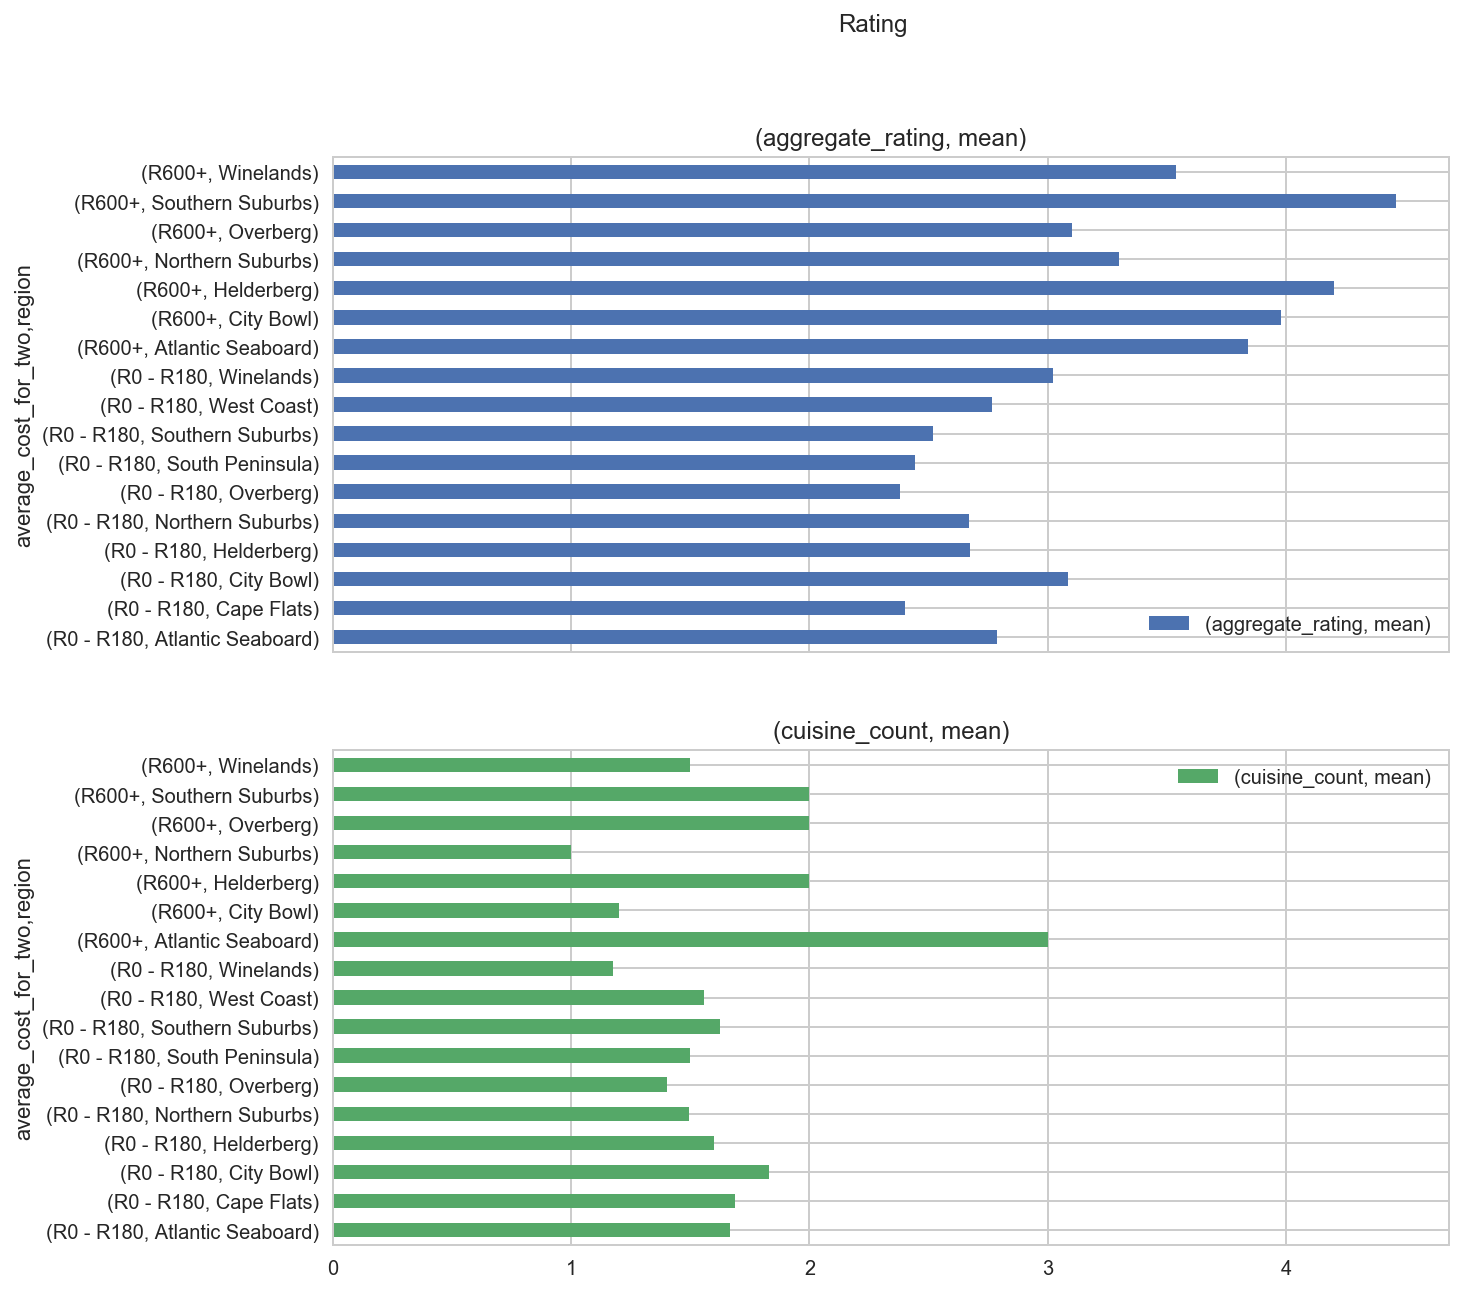

In [204]:
data_by_cost.loc[["R0 - R180", "R600+"]][["aggregate_rating", "cuisine_count"]].plot.barh(legend=True, 
                                                                                        title="Rating", 
                                                                                        figsize=(10,10), 
                                                                                       logx=False, subplots=True)